In [74]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import compute_class_weight
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

np.random.seed(42)

In [91]:
df = pd.read_csv('data/creditcard_newds.csv')
ds = df.to_numpy()
y = ds[:, -1] # for last column
x = ds[:, :-1] # for all but last column


#under = RandomUnderSampler()
#steps = [('u', under)]
#pipeline = Pipeline(steps=steps)
#X_sampled, y_sampled = pipeline.fit_resample(x, y)
#print('class 0: ',len(y_sampled[y_sampled == 0]))
#print('class 1:', len(y_sampled[y_sampled == 1]))
#x, y = X_sampled, y_sampled

print(df.head)
print(x.shape)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(X_train.shape)

<bound method NDFrame.head of                 Time         V1         V2         V3        V4         V5  \
0       82450.000000   1.314539   0.590643  -0.666593  0.716564   0.301978   
1       50554.000000  -0.798672   1.185093   0.904547  0.694584   0.219041   
2       55125.000000  -0.391128  -0.245540   1.122074 -1.308725  -0.639891   
3      116572.000000  -0.060302   1.065093  -0.987421 -0.029567   0.176376   
4       90434.000000   1.848433   0.373364   0.269272  3.866438   0.088062   
...              ...        ...        ...        ...       ...        ...   
13803   28660.144835 -28.553925  15.889210 -29.492664  6.448861 -20.805347   
13804  150305.516421  -2.679064  -0.939409  -3.899026  2.935596   0.009975   
13805   91713.789482   0.931282   2.237816  -4.965300  2.593112   1.230142   
13806   94362.000000 -26.457745  16.497472 -30.177317  8.904157 -17.892600   
13807  116425.974840  -0.057156   1.913101  -5.120289  2.445768  -1.101931   

             V6         V7       

In [92]:
# ein beispielhaftes NN model

model = Sequential()
model.add(Dense(30, input_shape=(30,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, input_shape=(30,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, input_shape=(30,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, input_shape=(30,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

print(class_weights)

model.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True, class_weight=class_weights)

{0.0: 0.8507922535211268, 1.0: 1.21267252195734}
Epoch 1/100
152/152 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5302
Epoch 2/100
152/152 [==============================] - 0s 865us/step - loss: 0.6932 - accuracy: 0.5193
Epoch 3/100
152/152 [==============================] - 0s 908us/step - loss: 0.6931 - accuracy: 0.5876
Epoch 4/100
152/152 [==============================] - 0s 968us/step - loss: 0.6932 - accuracy: 0.4292
Epoch 5/100
152/152 [==============================] - 0s 908us/step - loss: 0.6952 - accuracy: 0.4124
Epoch 6/100
152/152 [==============================] - 0s 866us/step - loss: 0.6935 - accuracy: 0.4123
Epoch 7/100
152/152 [==============================] - 0s 762us/step - loss: 0.7875 - accuracy: 0.4123
Epoch 8/100
152/152 [==============================] - 0s 864us/step - loss: 0.6960 - accuracy: 0.4123
Epoch 9/100
152/152 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4124
Epoch 10/100
152/152 [======

## Evaluation of NN model

In [95]:
predictions = model.predict(X_test)
predictions[predictions <= 0.5] = 0.
predictions[predictions > 0.5] = 1.

In [96]:
print('Accuracy: ', accuracy_score(predictions, y_test))
print('Precision: ', precision_score(predictions, y_test))
print('Recall: ', recall_score(predictions, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
false_positive_rate = fp / (fp + tn)

print('false positive rate', false_positive_rate)

Accuracy:  0.4105720492396814
Precision:  1.0
Recall:  0.4105720492396814
false positive rate 1.0


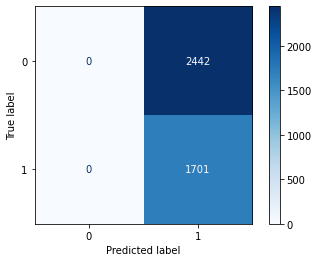

Anzahl der Frauds:  1701


In [97]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print('Anzahl der Frauds: ', len(y_test[y_test==1]))